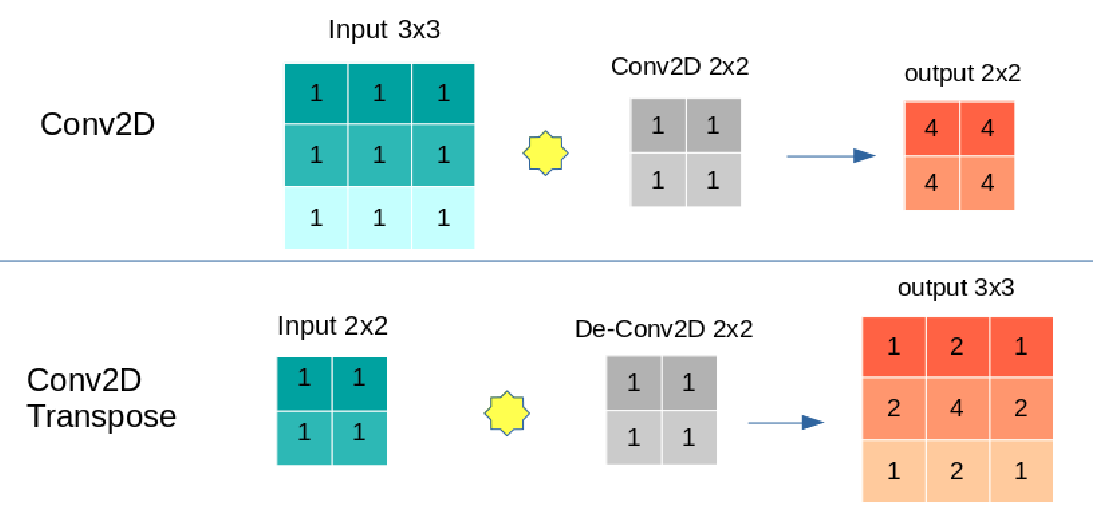

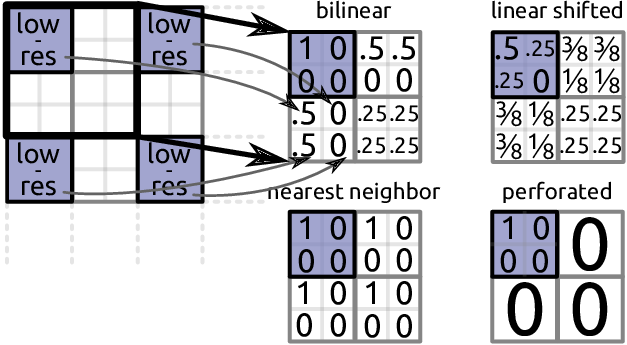

In [ ]:
"""

Difference between UpSampling2D and Conv2DTranspose
These are the two common types of layers that can be used to increase the dimensions of arrays.
UpSampling2D is like the opposite of pooling where it repeats rows and columns of the input.
Conv2DTranspose performs up-sampling and convolution. 
Conv2DTranspose has been reported to result in Checkerboard artifacts but 
unfortunately not much information on the comparison of UpSampling2D vs Conv2DTranspose.
"""

from numpy import asarray
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import UpSampling2D, Input

# define simple 3x3 input for this exercise
X = asarray([[1, 2, 3],
             [4, 5, 6],
             [7, 8, 9]])

# reshape input data te get it ready for the model (N, x, y, channels)
X = X.reshape((1, X.shape[0], X.shape[1], 1))


"""
Let us define a model. 
#Upsampling size: for size=(2,2) output would be 6,6 since our array size is 3x3 
#and for size=(3,3) output would be 9x9
"""

model = Sequential()
model.add(Input(shape=(X.shape[1], X.shape[2], 1)))
model.add(UpSampling2D(size = (2,2)))
model.summary()

# Apply the model to our input data
upsampled_X = model.predict(X)

# reshape to just get our x and y
upsampled_X = upsampled_X.reshape((upsampled_X.shape[1],upsampled_X.shape[2]))
print(upsampled_X)

########################################################

# example of using the transpose convolutional layer
from numpy import asarray
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2DTranspose, Input

# define simple 3x3 input for this exercise
X = asarray([[1, 2, 3],
             [4, 5, 6],
             [7, 8, 9]])

# reshape input data te get it ready for the model (N, x, y, channels)
X = X.reshape((1, X.shape[0], X.shape[1], 1))


"""
The Conv2DTranspose upsamples and also performs a convolution. 
Since this includes convolution we need to specify both the size and 
number of filters. We also need to specify stride that gets used for upsampling. 
With a stride of (2,2) the rows and columns of value 0 are inserted to get this stride. 
In this example:
    num_features = 1 (normally we have 64 or 128 or 256 .. etc. )
    kernel size = 1×1
    stride = 2x2 (so a 3x3 image will result as 6x6). 1x1 stride will return the input
Also try stride 3x3 (result will be 9x9 as out input is 3x3 size)
We will initialize kernel by using weights =1. Otherwise it assigns random weights 
and output will not make sense. 
"""

model1 = Sequential()
model1.add(Input(shape=(X.shape[1], X.shape[2], 1)))
model1.add(Conv2DTranspose(1, (1,1), strides=(2,2), kernel_initializer='ones'))
model1.summary()


# Apply the model to our input data
transposed_X = model1.predict(X)
transposed_X = transposed_X.reshape((transposed_X.shape[1],transposed_X.shape[2]))
print(transposed_X)